In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Read and flatten the DNA sequence from the provided FASTA file
def load_fasta(file_path):
    dna_sequence = ''
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('>'):
                dna_sequence += line.strip().upper()
    return ''.join([char for char in dna_sequence if char in 'ACGT'])

# Load the DNA sequence from the FASTA file
dna_sequence = load_fasta('singleline_output.fasta')


In [26]:

# Define nucleotides and initialize the transition matrix
nucleotides = 'ACGT'
transition_matrix = np.zeros((4, 4))

# Normalize the transition counts to fill the transition matrix
for row_idx, from_nucleotide in enumerate(nucleotides):
    total_transitions = sum(transition_counts[from_nucleotide].values())
    if total_transitions > 0:
        for col_idx, to_nucleotide in enumerate(nucleotides):
            transition_matrix[row_idx][col_idx] = transition_counts[from_nucleotide][to_nucleotide] / total_transitions


In [27]:
transition_df = pd.DataFrame(transition_matrix, index=list('ACGT'), columns=list('ACGT'))

print("Markov Transition Matrix (rows = from, columns = to):")
print(transition_df.round(4))

Markov Transition Matrix (rows = from, columns = to):
        A       C       G       T
A  0.2509  0.2426  0.2648  0.2417
C  0.2465  0.2544  0.2449  0.2541
G  0.2518  0.2474  0.2556  0.2452
T  0.2709  0.2374  0.2502  0.2414


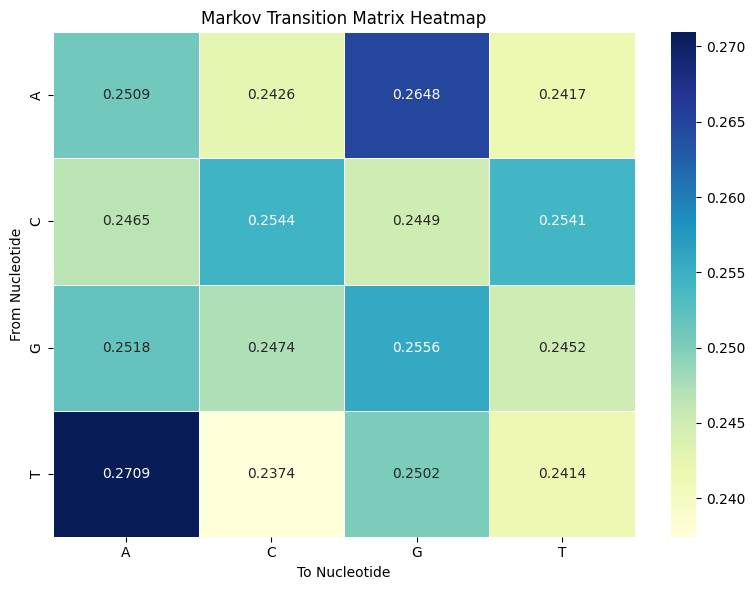

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(transition_df, annot=True, cmap='YlGnBu', fmt='.4f', cbar=True, linewidths=0.5)

# Customize the plot labels and title
plt.title("Markov Transition Matrix Heatmap")
plt.xlabel("To Nucleotide")
plt.ylabel("From Nucleotide")

# Show the plot
plt.tight_layout()
plt.show()

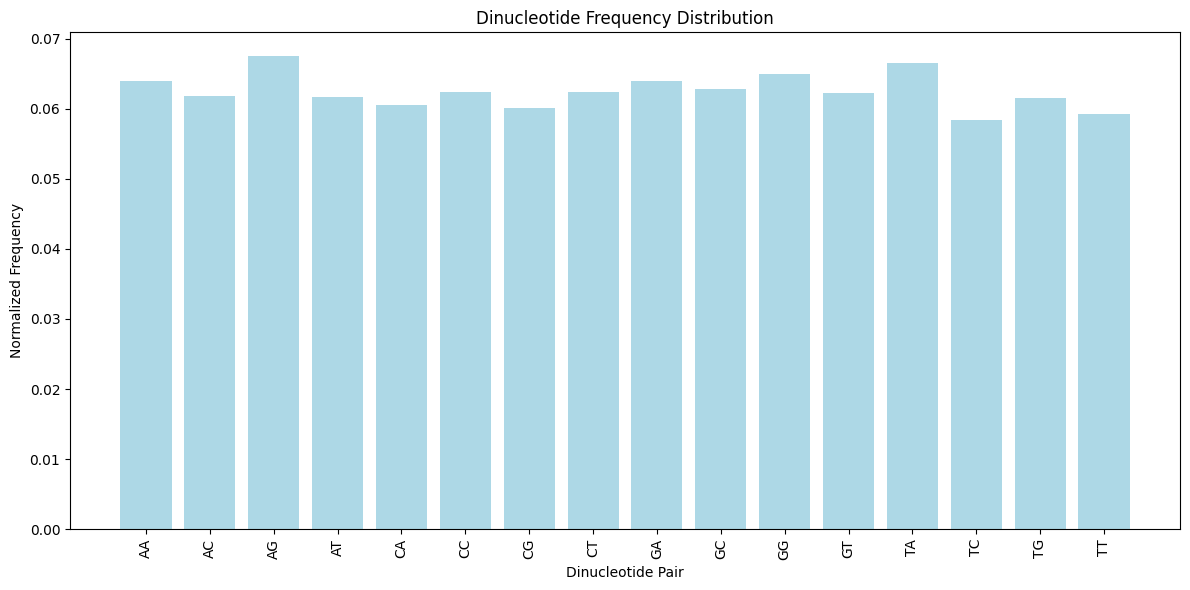

In [30]:
dinucleotide_counts = defaultdict(int)

# Iterate over the sequence to count each dinucleotide pair
for i in range(len(dna_sequence) - 1):
    dinucleotide = dna_sequence[i:i+2]
    if dinucleotide in ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']:
        dinucleotide_counts[dinucleotide] += 1

# Normalize the counts
total_dinucleotides = len(dna_sequence) - 1
dinucleotide_freq = {key: value / total_dinucleotides for key, value in dinucleotide_counts.items()}

# Sort dinucleotides for plotting
sorted_dinucleotides = sorted(dinucleotide_freq.keys())
sorted_freq = [dinucleotide_freq[dinucleotide] for dinucleotide in sorted_dinucleotides]

# Plotting the dinucleotide frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(sorted_dinucleotides, sorted_freq, color='lightblue')

# Customize the plot
plt.xlabel('Dinucleotide Pair')
plt.ylabel('Normalized Frequency')
plt.title('Dinucleotide Frequency Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()